In [12]:
# Initial imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

* Part 1: Prepare the Data

In [13]:
# Loading data from csv
df = pd.read_csv("myopia.csv")
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [14]:
col = "MYOPIC"
X = df.loc[:, df.columns != col]
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [15]:
# Standarize data with StandarScaler
X_scaled_data = StandardScaler().fit_transform(X)
#X_scaled_data

* Part 2: Apply Dimensionality Reduction 

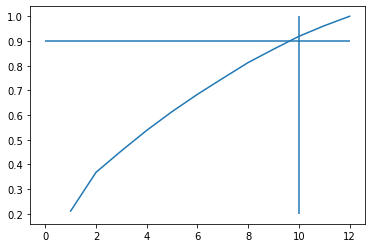

In [16]:
# There are 14 independent variables and one dependent variable 
variance = np.arange(0.1, 1.0, 0.01)
components =[]
sum_of_components=[]
for i in variance:
    
    # Initialize PCA model
    pca = PCA(n_components=i)
    
    # Get two principal components.
    X_pca = pca.fit_transform(X_scaled_data)
    
    # variance explained
    sum_of_components.append(pca.explained_variance_ratio_.sum())
    
    # number of principle components
    components.append(len(pca.explained_variance_ratio_))
    
plt.plot(components, sum_of_components)
plt.hlines(0.9,0,12)
plt.vlines(10, 0.2, 1)

In [17]:
# Initialize PCA model components explaining about 90% variance
pca = PCA(n_components=10)
    
# Get two principal components.
X_pca = pca.fit_transform(X_scaled_data)
    
# variance explained
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [18]:
# Note shorter method by setting desired variance explained
pca = PCA(n_components=0.9)
    
# Get two principal components.
X_pca = pca.fit_transform(X_scaled_data)
    
# variance explained
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [19]:
X_pca.shape

(618, 10)

In [20]:
components=[]
for i in range(len(pca.components_)):
    components.append(f'pc{i+1}')
    
# Transform PCA data to a DataFrame
df_X_pca = pd.DataFrame(
    data=X_pca, columns = components
)
df_X_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [21]:
#further reduce the dataset dimensions with t-SNE and visually inspect the results
#initialize t-SNE model
tsne = TSNE(learning_rate = 250)
#reduce dimensions
tsne_features = tsne.fit_transform(df_X_pca)
#check results
tsne_features.shape

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

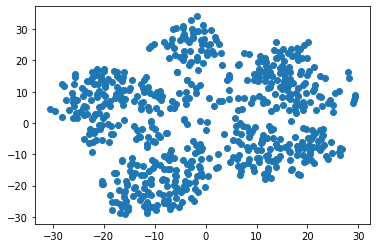

In [22]:
#Plot results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

* Part 3: Perform a Cluster Analysis with K-means

In [23]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


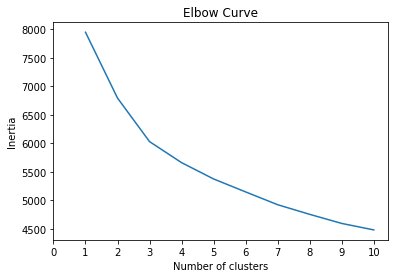

In [24]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig("Visualizations/Elbow_Plot.png")
plt.show()

* elbow of the curve appears to be at a k value of 3 to 5

In [25]:
#create visualization by coloring the scatterplot with the determined K-means clusters
# Initialize the K-Means model
model1 = KMeans(n_clusters=3, random_state=42)
# Train the model
model1.fit(tsne_features)
# Predict clusters
predictions = model1.predict(tsne_features)
cluster_labels = model1.labels_

In [26]:
#create new df with cluster labels
clustered_df = pd.DataFrame(tsne_features, columns=["A_Comp", "B_Comp"])
clustered_df["Cluster"] = cluster_labels
clustered_df.head()

,A_Comp,B_Comp,Cluster
0,-6.164710,4.907348,2
1,-4.358947,-21.472462,0
2,18.542374,15.550691,1
3,18.464472,-16.746244,1
4,-25.331120,1.494336,2


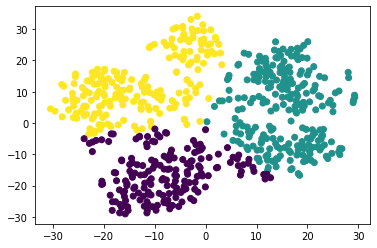

In [27]:
#redo scatterplot with new clusters as colors
plt.scatter(clustered_df["A_Comp"], clustered_df["B_Comp"], c=clustered_df["Cluster"])
plt.savefig("Visualizations/Clusters3.png")
plt.show()

In [28]:
model2 = KMeans(n_clusters=5, random_state=42)
# Train the model
model2.fit(tsne_features)
# Predict clusters
predictions = model2.predict(tsne_features)
cluster_labels_1 = model2.labels_

In [29]:
#create new df with cluster labels
clustered_df = pd.DataFrame(tsne_features, columns=["C_Comp", "D_Comp"])
clustered_df["Cluster"] = cluster_labels_1
clustered_df.head()

,C_Comp,D_Comp,Cluster
0,-6.164710,4.907348,2
1,-4.358947,-21.472462,0
2,18.542374,15.550691,1
3,18.464472,-16.746244,3
4,-25.331120,1.494336,2


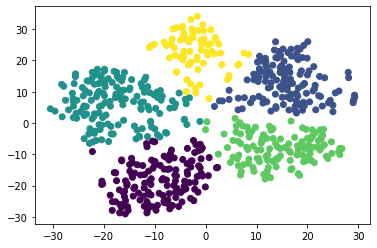

In [30]:
#redo scatterplot with new clusters as colors
plt.scatter(clustered_df["C_Comp"], clustered_df["D_Comp"], c=clustered_df["Cluster"])
plt.savefig("Visualizations/Clusters5.png")
plt.show()

* Part 4: Based on my analyses, the optimal number of clusters can be 3 to 5. 


#Note: I think columns with smaller values may not need to standardize together with other columns having larger values. This can be explored further. As I the clustering visualizations look reasonable, I have not explored that option. 